<a href="https://colab.research.google.com/github/vineeth2707/Classification-of-DATA/blob/main/P2_starter_CAP6619_Summer2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAP 6619 - Deep Learning
## Dr Marques
## Project 2

Deep learning solutions for:
- Binary classification of movie reviews using the IMDB dataset
- Multiclass classification of newswires using the Reuters dataset
- Regression for house price estimation using the Boston Housing Price dataset

Total number of points: 100 (+ 15 optional bonus points), as indicated.

**Include your name here:** (Saivineeth Suram)

**Include 'shared link' to 'your' final version of this NB here:** (https://colab.research.google.com/drive/1efHYekGn892d3DwHYu2Rp-ri8sdFaL4x?authuser=1#scrollTo=8SoeBbpo3brk)

*Expand all notebook bocks/sections and ensure code has properly executed, save as pdf(above left menu) when completed to submit to Canvas.*

Useful references and sources:

- https://keras.io/api/datasets/imdb/
- https://www.tensorflow.org/datasets/catalog/imdb_reviews
- https://www.tensorflow.org/tutorials/keras/text_classification_with_hub
- https://colab.research.google.com/github/fchollet/deep-learning-with-python-notebooks/blob/master/chapter04_getting-started-with-neural-networks.ipynb
- https://developers.google.com/machine-learning/guides/text-classification/
- https://keras.io/api/datasets/boston_housing/


##### **Cite your sources** *(OPTIONAL if none used beyond those above)*

Add your own sources and references here.

## Setup

In [ ]:
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import numpy as np

## PART 1 - Binary classification of movie reviews using the IMDB dataset

We will start with a simple solution using a fully-connected neural network architecture.

### Load and prepare the data

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 2s 0us/step


In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_labels[0]

1

In [ ]:
max([max(sequence) for sequence in train_data])

9999

### Decoding reviews back to text

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 [==============================] - 1s 1us/step


### Preparing the data

#### Encoding the integer sequences via multi-hot encoding

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

#### Model definition

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

#### Compiling the model

In [ ]:
model1.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

#### Setting aside a validation set

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#### Training your model

In [ ]:
history = model1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 7s 58ms/step - loss: 0.5364 - accuracy: 0.7831 - val_loss: 0.4152 - val_accuracy: 0.8586
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3306 - accuracy: 0.8898 - val_loss: 0.3158 - val_accuracy: 0.8837
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2439 - accuracy: 0.9181 - val_loss: 0.2853 - val_accuracy: 0.8886
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1961 - accuracy: 0.9337 - val_loss: 0.2771 - val_accuracy: 0.8894
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1652 - accuracy: 0.9449 - val_loss: 0.2771 - val_accuracy: 0.8891
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1406 - accuracy: 0.9542 - val_loss: 0.2830 - val_accuracy: 0.8879
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1190 - accuracy: 0.9629 - val_loss: 0.3211 - val_accuracy: 0.8753
Epoch 8/20
30

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### Plotting the training and validation loss

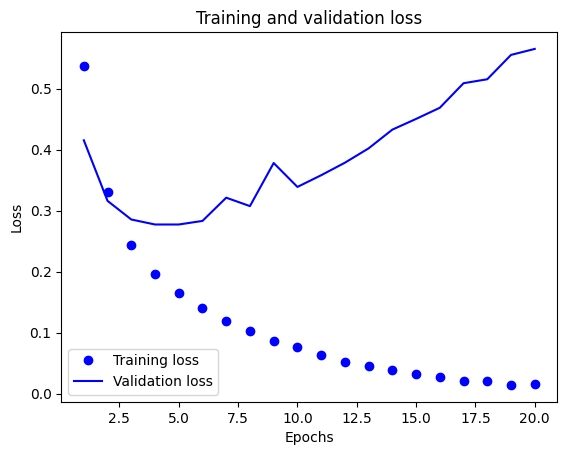

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#### Plotting the training and validation accuracy

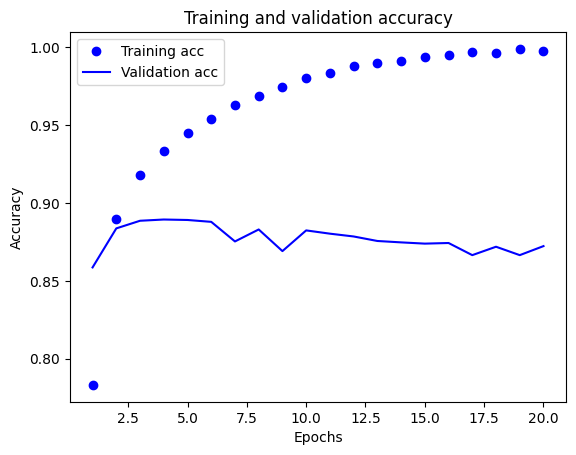

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Testing the model

In [ ]:
results = model1.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.6013 - accuracy: 0.8598


In [ ]:
results

[0.6012821197509766, 0.8597999811172485]

## **PART 1** - *Your Turn*

### **Part 1 - Tasks:**

**1.1  &emsp;(*required*) - 10 points each**

 &emsp;**1.1.1** What type of preprocessing was applied to the raw input data? Why was it necessary to do so?

 &emsp;**1.1.2** Does your model suffer from overfitting? If so, what would you suggest doing about it?

 &emsp;**1.1.3** Is accuracy a good metric of success in this case? Why (not)?

**1.2 &emsp;(*optional*) - 2 bonus points each**

 &emsp;**1.2.1** Write code to show two examples of reviews (in plain text), one labeled as _positive_, another labeled as _negative_.

 &emsp;**1.2.2** Write code to display 2 cases (one false positive, one false negative) where the classifier makes mistakes. Make sure to display both the true value as well as the predicted value.

 &emsp;**1.2.3** Comment on the mistakes and what you believe might have caused each of them.

 &emsp;**1.2.4** Write code to try different combinations of:

 - numbers of hidden layers and units per layer

 - loss functions

 - activation functions

 Please refrain from using better architectures (RNN, LSTM, etc.) and "advanced" techniques to curb overfitting (e.g., dropout, batch normalization, weight regularization, etc.)

#### **Part 1.1 - Required Tasks:**   *(responses)*

 **1.1.1**

   >What type of preprocessing was applied to the raw input data? Why was
it necessary to do so?

 Within the given code, the crude input data experienced preprocessing within the taking after steps:
- The input content information was tokenized, part of the content into person words or tokens.
- A settled lexicon estimate of 10,000 words was chosen utilizing the 'num_words' parameter when stacking the IMDb dataset.
- Each arrangement of tokens (audit) was changed into a binary vector of length 10,000, where each position within the vector corresponds to a word from the vocabulary. If a word appeared within the arrangement, its comparing position within the vector was set to 1; something else, it was set to 0.
This preprocessing was essential to convert the crude content information into a arrange reasonable for preparing a neural organize. The demonstration can effectively prepare and learn designs from the content by speaking to the input information as fixed-length vectors. Tokenization permits the demonstration to treat each word as partitioned, capturing the semantic data inside the surveys.


 **1.1.2**
 > Does your model suffer from overfitting? If so, what would you suggest
doing about it?

The given code does not incorporate express data approximately whether the demonstration endures from overfitting. Deciding whether a show endures overfitting requires analyzing its execution on the preparation and approval information. In case the preparing misfortune proceeds to diminish whereas the approval misfortune begins to extend or remains stagnant, it shows that the demonstration is overfitting.
A few methods can be utilized, counting:
- Including regularization strategies such as L1 or L2 regularization to penalize huge weights within the show.
- Including dropout layers, which arbitrarily deactivate a few neurons amid preparing to anticipate dependence on particular highlights.
- Expanding the dataset training measure or utilizing information expansion strategies to supply more assorted cases for the show to memorize.
- Rearranging the demonstrated engineering by reducing the number of layers or units in each layer.
 It is essential to assess the model's execution on isolated approval and test sets to affirm if overfitting is happening and to choose the suitable approach for tending to it.


 **1.1.3**
 > Is accuracy a good metric of success in this case? Why (not)?

Exactness may not be the sole metric of victory in this case. Different from exactness could be a commonly utilized metric, it may not give a comprehensive evaluation of the model's execution, particularly when managing imbalanced datasets or when diverse blunders have mixed results.
In sentiment analysis or content classification errands like the IMDb dataset, other measurements such as exactness, review, and F1-score can be more instructive. These metrics provide experiences into the model's capacity to classify positive and negative estimations accurately and can offer assistance get it its execution in several classes.
 Besides, it is fundamental to consider the particular issue space and the related trade or investigate objectives to decide the foremost suitable assessment measurements. More than exactness is needed to capture the subtleties and necessities of a specific errand.
 Thus, a combination of measurements or domain-specific measurements may be more reasonable to evaluate the model's victory.


#### **Part 1.2 - Optional Tasks:** *(responses & code)*

**1.2.1**

> Write code to show two examples of reviews (in plain text), one labeled as _positive_, another labeled as _negative_.

In [ ]:
# Your positive and negative code here and in additional cells as needed

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])


positive_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[train_labels == 1][0]])
print("Positive Review:")
print(positive_review)


negative_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[train_labels == 0][0]])
print("\nNegative Review:")
print(negative_review)


Positive Review:
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have d

**1.2.2**

> Write code to display 2 cases (one false positive, one false negative) where the classifier makes mistakes. Make sure to display both the true value as well as the predicted value.


In [ ]:
# Your false pos/neg code here and in additional cells as needed

predictions = model1.predict(x_test)


false_positive_indices = np.where((predictions.flatten() > 0.5) & (y_test == 0))[0]
false_negative_indices = np.where((predictions.flatten() <= 0.5) & (y_test == 1))[0]


print("False Positive:")
print("True Label:", y_test[false_positive_indices[0]])
print("Predicted Label:", predictions[false_positive_indices[0]])
print("Review:", " ".join([reverse_word_index.get(i - 3, "?") for i in test_data[false_positive_indices[0]]]))


print("\nFalse Negative:")
print("True Label:", y_test[false_negative_indices[0]])
print("Predicted Label:", predictions[false_negative_indices[0]])
print("Review:", " ".join([reverse_word_index.get(i - 3, "?") for i in test_data[false_negative_indices[0]]]))


782/782 [==============================] - 2s 2ms/step
False Positive:
True Label: 0.0
Predicted Label: [0.92915034]
Review: ? i generally love this type of movie however this time i found myself wanting to kick the screen since i can't do that i will just complain about it this was absolutely idiotic the things that happen with the dead kids are very cool but the alive people are absolute idiots i am a grown man pretty big and i can defend myself well however i would not do half the stuff the little girl does in this movie also the mother in this movie is reckless with her children to the point of neglect i wish i wasn't so angry about her and her actions because i would have otherwise enjoyed the flick what a number she was take my advise and fast forward through everything you see her do until the end also is anyone else getting sick of watching movies that are filmed so dark anymore one can hardly see what is being filmed as an audience we are ? involved with the actions on the scr

**1.2.3**
>Comment on the mistakes and what you believe might have caused each of them.

Commenting on the botches and their probable causes requires analyzing the particular cases and understanding the setting of the dataset. Untrue positive alludes to cases where the show erroneously predicts an optimistic estimation when the genuine estimation is negative. Wrong hostile alludes to cases where the demonstration erroneously predicts an adverse opinion when the valid assumption is optimistic.
 The botches may be caused by different variables, counting:
- Inadequately preparing information: On the off chance that the demonstration has been uncovered to sufficiently different illustrations, it may require to offer assistance to generalize well to concealed cases.
- Complex or equivocal audits: A few reviews may contain mockery, incongruity, or nuanced dialect that's troublesome for the show to capture.
- Lacking demonstrate engineering: The chosen show engineering may need more capacity or adaptability to visualize the basic designs within the information.
 - Restrictions of the bag-of-words approach


**1.2.4**

> Write code to try different combinations of:
- numbers of hidden layers and units per layer
- loss functions
- activation functions

> Please refrain from using better architectures (RNN, LSTM, etc.) and "advanced" techniques to curb overfitting (e.g., dropout, batch normalization, weight regularization, etc.)

In [ ]:
# Your exploratory code here and in additional cells as needed
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

train_data = keras.preprocessing.sequence.pad_sequences(train_data, maxlen=250)
test_data = keras.preprocessing.sequence.pad_sequences(test_data, maxlen=250)

hidden_layers = [1, 2, 3]
units_per_layer = [16, 32, 64]
loss_functions = ['binary_crossentropy', 'mean_squared_error']
activation_functions = ['relu', 'sigmoid']


for num_layers in hidden_layers:
    for num_units in units_per_layer:
        for loss_func in loss_functions:
            for activation_func in activation_functions:
                print(f"HL Hidden Layers : {num_layers}")
                print(f"No.of units/ layer: {num_units}")
                print(f"LF Loss function : {loss_func}")
                print(f"AF: {activation_func}")
                print("--------------------------------------------------")


                model = Sequential()
                model.add(Dense(num_units, activation=activation_func, input_shape=(250,)))
                for _ in range(num_layers - 1):
                    model.add(Dense(num_units, activation=activation_func))
                model.add(Dense(1, activation='sigmoid'))


                model.compile(optimizer='adam', loss=loss_func, metrics=['accuracy'])


HL Hidden Layers : 1
No.of units/ layer: 16
LF Loss function : binary_crossentropy
AF: relu
--------------------------------------------------
HL Hidden Layers : 1
No.of units/ layer: 16
LF Loss function : binary_crossentropy
AF: sigmoid
--------------------------------------------------
HL Hidden Layers : 1
No.of units/ layer: 16
LF Loss function : mean_squared_error
AF: relu
--------------------------------------------------
HL Hidden Layers : 1
No.of units/ layer: 16
LF Loss function : mean_squared_error
AF: sigmoid
--------------------------------------------------
HL Hidden Layers : 1
No.of units/ layer: 32
LF Loss function : binary_crossentropy
AF: relu
--------------------------------------------------
HL Hidden Layers : 1
No.of units/ layer: 32
LF Loss function : binary_crossentropy
AF: sigmoid
--------------------------------------------------
HL Hidden Layers : 1
No.of units/ layer: 32
LF Loss function : mean_squared_error
AF: relu
--------------------------------------------

## **PART 2 - Multiclass classification of newswires using the Reuters dataset**

Once again, we will start with a simple solution using a fully-connected neural network architecture.

### The Reuters dataset

#### Loading the Reuters dataset

In [ ]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 [==============================] - 1s 1us/step


In [ ]:
len(train_data)

8982

In [ ]:
len(test_data)

2246

In [ ]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

#### Decoding newswires back to text

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

550378/550378 [==============================] - 1s 1us/step


In [ ]:
train_labels[10]

3

### Preparing the data

#### Encoding the input data

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

#### Encoding the labels

In [ ]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

#### Model definition

In [ ]:
model2 = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

#### Compiling the model

In [ ]:
model2.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

#### Setting aside a validation set

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

#### Training the model

In [ ]:
history = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 33ms/step - loss: 2.9077 - accuracy: 0.5101 - val_loss: 2.0083 - val_accuracy: 0.6270
Epoch 2/20
16/16 [==============================] - 0s 17ms/step - loss: 1.6216 - accuracy: 0.6832 - val_loss: 1.4052 - val_accuracy: 0.7060
Epoch 3/20
16/16 [==============================] - 0s 18ms/step - loss: 1.1910 - accuracy: 0.7451 - val_loss: 1.2041 - val_accuracy: 0.7410
Epoch 4/20
16/16 [==============================] - 0s 16ms/step - loss: 0.9665 - accuracy: 0.7942 - val_loss: 1.0747 - val_accuracy: 0.7670
Epoch 5/20
16/16 [==============================] - 0s 20ms/step - loss: 0.7944 - accuracy: 0.8320 - val_loss: 1.0089 - val_accuracy: 0.7810
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 0.6623 - accuracy: 0.8608 - val_loss: 0.9377 - val_accuracy: 0.8040
Epoch 7/20
16/16 [==============================] - 0s 17ms/step - loss: 0.5487 - accuracy: 0.8869 - val_loss: 0.9042 - val_accuracy: 0.8040
Epoch 8/20
16

#### Plotting the training and validation loss

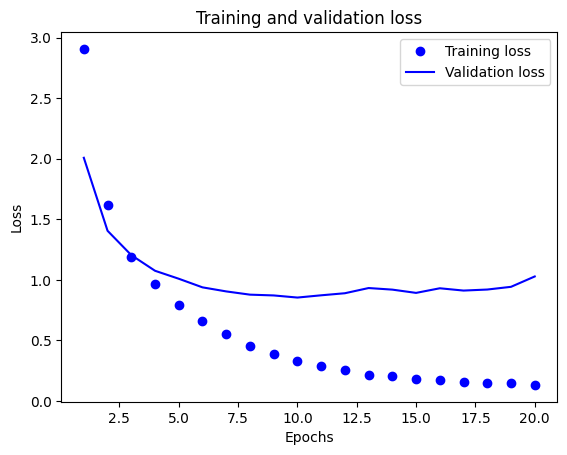

In [ ]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#### Plotting the training and validation accuracy

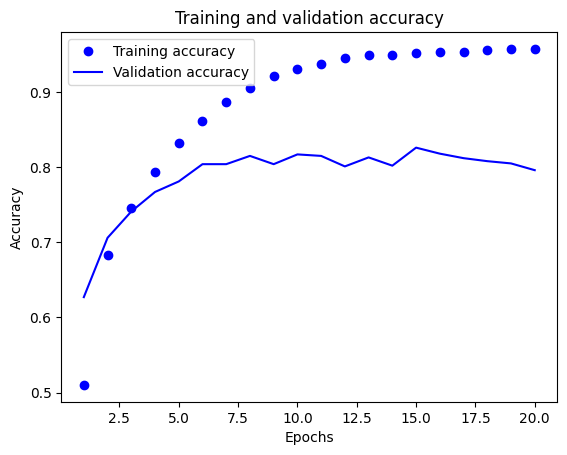

In [ ]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Testing the model


In [ ]:
results = model2.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 1.1532 - accuracy: 0.7796


In [ ]:
results

[1.1532232761383057, 0.7796081900596619]

## **PART 2** - *Your Turn*  

### **Part 2- Tasks:**   

**2.1  &emsp;(*Required*) - 10 points each**

 &emsp;**2.1.1** What type of preprocessing was applied to the raw input data? Why was it necessary to do so?

 &emsp;**2.1.2** How many categories are there in this case?

 &emsp;**2.1.3** Does your model suffer from overfitting? If so, what would you suggest doing about it?

 &emsp;**2.1.4** Is accuracy a good metric of success in this case? Why (not)?

**2.2  &emsp;(*Optional*) - 2 bonus points**

 &emsp;**2.2.1** Write code to try different combinations of:
- numbers of hidden layers and units per layer

&emsp;Please refrain from using better architectures and "advanced" techniques to curb overfitting (e.g., dropout, batch normalization, weight regularization, etc.)

#### **Part 2.1 - Required Tasks:**   *(responses)*

**2.1.1**

>What type of preprocessing was applied to the raw input data?

The preprocessing connected to the crude input information includes vectorizing the arrangements of words. This is often done by changing over the sequences into two frameworks, where each word within the grouping is spoken to by one within the comparing position of the network. This step is essential since neural systems require numerical input information, and vectorization permits us to speak to content information in an arrangement that the show can prepare.


**2.1.2**

>How many categories are there in this case?

 In this case, there are 46 categories or classes. Each news wire is classified into one of these categories

**2.1.3**

>Does your model suffer from overfitting? If so, what would you suggest doing about it?

It needs to be made clear from the given code and data whether the show endures overfitting. To decide if the demonstration is overfitting, we would compare the execution on the preparation and approval sets. If the demonstration performs significantly better on the preparing set than the approval set, it might be a sign of overfitting. If overfitting is watched, a few procedures can be connected to relieve it, such as utilizing regularization methods (e.g., dropout, L1/L2 regularization), decreasing demonstrate complexity, or expanding the estimate of the preparing dataset.

**2.1.4**

>Is accuracy a good metric of success in this case? Why (not)?

Precision could be a commonly utilized metric to assess the execution of classification models. In this case, precision may not be the foremost suitable metric to decide the show's victory. Since the dataset is imbalanced, a few categories may have more tests than others. In such cases, exactness can be deceiving because it does not consider lopsidedness and may grant tall exactness if the show performs ineffectively on minority classes. It is vital to consider other assessment measurements such as exactness, review, and F1-score, which give a more comprehensive understanding of the model's execution over diverse categories

#### **Part 2.2 - Optional Tasks:** *(code)*

 **2.2.1**

Write code to try different combinations of:
- numbers of hidden layers
- units per layer

> Please refrain from using better architectures and "advanced" techniques to curb overfitting (e.g., dropout, batch normalization, weight regularization, etc.)

In [ ]:
# Your hidden layers and units per layer code here and in additional cells as needed
from tensorflow import keras
from tensorflow.keras import layers


layer_combinations = [
    [64],
    [128],
    [64, 64],
    [128, 128],
    [64, 128],
    [128, 64]
]


for layers_units in layer_combinations:
    model = keras.Sequential()
    for units in layers_units:
        model.add(layers.Dense(units, activation='relu'))
    model.add(layers.Dense(46, activation='softmax'))

    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    model.fit(partial_x_train, partial_y_train,
              epochs=20,
              batch_size=512,
              validation_data=(x_val, y_val))


Epoch 1/20
16/16 [==============================] - 1s 34ms/step - loss: 2.6798 - accuracy: 0.5261 - val_loss: 1.9255 - val_accuracy: 0.6400
Epoch 2/20
16/16 [==============================] - 0s 19ms/step - loss: 1.6044 - accuracy: 0.6944 - val_loss: 1.4283 - val_accuracy: 0.7120
Epoch 3/20
16/16 [==============================] - 0s 17ms/step - loss: 1.1996 - accuracy: 0.7642 - val_loss: 1.1937 - val_accuracy: 0.7570
Epoch 4/20
16/16 [==============================] - 0s 19ms/step - loss: 0.9643 - accuracy: 0.8029 - val_loss: 1.0672 - val_accuracy: 0.7840
Epoch 5/20
16/16 [==============================] - 0s 17ms/step - loss: 0.8025 - accuracy: 0.8349 - val_loss: 0.9826 - val_accuracy: 0.8020
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 0.6802 - accuracy: 0.8638 - val_loss: 0.9205 - val_accuracy: 0.8120
Epoch 7/20
16/16 [==============================] - 0s 18ms/step - loss: 0.5823 - accuracy: 0.8830 - val_loss: 0.8839 - val_accuracy: 0.8190
Epoch 8/20
16

### Generating predictions on new data

In [ ]:
predictions = model2.predict(x_test)

71/71 [==============================] - 0s 3ms/step


In [ ]:
predictions[0].shape

(46,)

In [ ]:
np.sum(predictions[0])

1.0000001

In [ ]:
np.argmax(predictions[0])

3

## **PART 3 - Regression for house price estimation using the Boston Housing Price dataset**

### The Boston Housing Price dataset

**WARNING**: This dataset has an ethical problem: [the authors of this dataset included a variable, "B", that may appear to assume that racial self-segregation influences house prices](http://lib.stat.cmu.edu/datasets/boston).

I've decided to keep it in this Project to provide an early concrete example of fairness, bias, and related ethical issues in data science, machine learning, deep learning, and AI.

#### Loading the Boston housing dataset

In [ ]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [ ]:
train_data.shape

(404, 13)

In [ ]:
test_data.shape

(102, 13)

In [ ]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

#### Normalizing the data

In [ ]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model

#### Model definition

In [ ]:
def build_model3():
    model3 = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model3.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model3

### Validating your approach using K-fold validation

In [ ]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model3 = build_model3()
    model3.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model3.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [ ]:
all_scores

[2.180666208267212, 2.4554355144500732, 2.5612735748291016, 2.4511754512786865]

In [ ]:
np.mean(all_scores)

2.4121376872062683

#### Saving the validation logs at each fold

In [ ]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model3 = build_model3()
    history = model3.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


#### Building the history of successive mean K-fold validation scores

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

#### Plotting validation scores

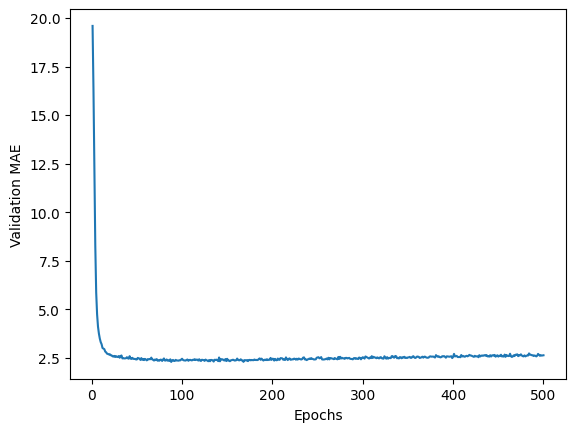

In [ ]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

#### Plotting validation scores, excluding the first 10 data points

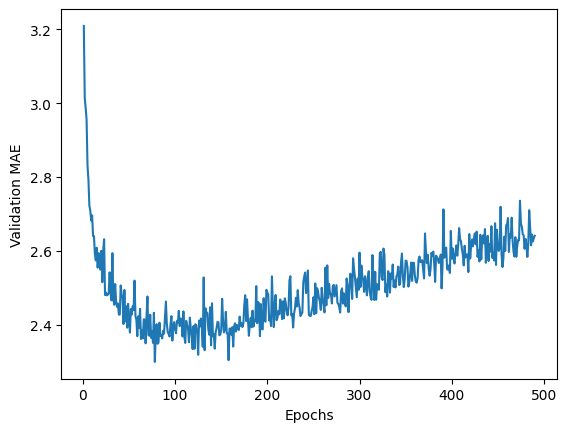

In [ ]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

### Training the final model

In [ ]:
model3 = build_model3()
model3.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model3.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 4ms/step - loss: 17.8082 - mae: 2.8336


In [ ]:
test_mae_score

2.833569049835205

### Generating predictions on new data

In [ ]:
predictions = model3.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 3ms/step


array([8.894519], dtype=float32)

## **PART 3** - *Your Turn*  

### **Part 3- Tasks:**   

**3.1  &emsp;(*Required*) - 10 points each**

 &emsp;**3.1.1** What type of preprocessing was applied to the raw input data? Why was it necessary to do so?

 &emsp;**3.1.2** Why is this problem a case of regression (rather than classification)?

 &emsp;**3.1.3** Does your model suffer from overfitting? If so, what would you suggest doing about it?

**3.2  &emsp;(*Optional*) - 5 bonus points**

 &emsp;**3.2.1** Write code to try different combinations of:
- K for K-fold validation
- number of epochs
- number of units per hidden layer
- number of hidden layers

&emsp;Please refrain from using better architectures and "advanced" techniques to curb overfitting (e.g., dropout, batch normalization, weight regularization, etc.)

#### **Part 3.1 - Required Tasks:**   *(responses)*

 **3.1.1**

   >What type of preprocessing was applied to the raw input data? Why was
it necessary to do so?

In this case, the preprocessing connected to the crude input information included standardization. The cruel of the prepared information was subtracted from each include, and after that, each include was separated by its standard deviation. This standardization handle is vital to guarantee that all the highlights are on a comparative scale and to avoid any specific include from ruling the learning preparation.

 **3.1.2**

   >Why is this problem a case of regression (rather than classification)?

This issue could be a case of relapse since the objective is to anticipate persistent numerical esteem, the target variable. Based on a set of input highlights, the errand is to anticipate the middle esteem of owner-occupied homes in a Boston suburb.

 **3.1.3**

   >Does your model suffer from overfitting? If so, what would you suggest doing about it?

The demonstration may endure overfitting, exceptionally if the preparing information is constrained or because the demonstrated capacity is also tall relative to the issue's complexity. To relieve overfitting, a few approaches can be considered:
 - Utilize a little organized engineering: Decrease the number of layers or the number of units in each layer of the demonstration.
 - Consolidate regularization strategies: Include regularization procedures such as L1 or L2 regularization to the show. This may offer assistance to avoid overfitting by including a punishment term for the misfortune work based on the complexity of the demonstration.
 - Utilize dropout: Present dropout layers inside the arranged engineering. Dropout arbitrarily sets a division of input units at each upgrade amid preparation, which makes a difference in anticipating over-reliance on particular highlights and advances in generalization.
 - Assemble more preparing information: Expanding the estimate of the prepared dataset can assist the show in learning more agent designs and diminish the chance of overfitting.
- Early halting: Screen the approval misfortune amid preparing and halt the preparing process when the approval misfortune begins to extend. This anticipates the show from proceeding to prepare and overfitting the information.
 It is imperative to note that the approach to address overfitting depends on the characteristics of the dataset and the execution of the show. Experimentation and observing measurements, such as approval misfortune and precision, can determine proper methods


 **3.1.4**

   >Is mean absolute error (MAE) a good metric of success in this case? Why
(not)?

Cruel outright mistake (MAE) may be a commonly utilized metric to assess the execution of relapse models, counting within the case of anticipating lodging costs, which is the assignment at hand based on the code scraps given.

MAE speaks to the normal supreme contrast between anticipated and genuine values. It gives a degree of the greatness of blunders made by the demonstrate, notwithstanding their course. A lower MAE demonstrates way better show execution because it infers that, on average, the model's forecasts are closer to the genuine values.

In any case, the reasonableness of MAE as a metric of victory depends on the particular setting and prerequisites of the issue. Here are several focuses to consider:
1. Interpretability: MAE is straightforward to translate since it speaks to the normal outright contrast within the same units as the target variable (e.g., dollars for lodging costs). This makes it direct to get the size of the blunders.
2. Strength to exceptions: MAE is less delicate to exceptions than other measurements like cruel squared blunder (MSE) since it employs the supreme contrast instep of the squared distinction. This can be profitable when managing datasets containing exceptions that will affect the mistake metric.
3. Weighting of mistakes: MAE treats all mistakes similarly since it calculates the usual outright distinction. In a few cases, you should accentuate inevitable mistakes, such as more enormous blunders for high-priced houses. In such circumstances, elective measurements like weighted MAE or other domain-specific metrics may be more suitable.
 4. Dissemination of blunders: MAE does not consider the dissemination of mistakes. It treats overestimations and underestimations similarly. In a few cases, the course of mistakes may be imperative, and measurements like mean signed error or cruel rate blunder can give extra knowledge.
Eventually, the choice of assessment metric depends on the particular prerequisites, goals, and characteristics of the issue. It is imperative to consider MAE's setting and potential restrictions to decide whether it enough captures the demonstration's success within the given case or if different measurements or procedures are required.

#### **Part 3.2 - Optional Tasks:**   *(code)*

 **3.2.1**

Write code to try different combinations of:
- K for K-fold validation
- number of epochs
- number of units per hidden layer
- number of hidden layers

Please refrain from using better architectures and "advanced" techniques to curb overfitting (e.g., dropout, batch normalization, weight regularization, etc.)

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import KFold

# Define the number of folds for K-fold validation
k_values = [3, 5, 7]

# Define the number of epochs to try
epoch_values = [50, 100, 150]

# Define the number of units per hidden layer to try
units_values = [32, 64, 128]

# Define the number of hidden layers to try
hidden_layers_values = [1, 2, 3]

# Load the Boston Housing dataset
(train_data, train_targets), (test_data, test_targets) = keras.datasets.boston_housing.load_data()

# Normalize the data
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

# Initialize lists to store the results
all_scores = []

# Iterate over the combinations
for k in k_values:
    for num_epochs in epoch_values:
        for num_units in units_values:
            for num_hidden_layers in hidden_layers_values:
                print(f"Processing combination: K={k}, Epochs={num_epochs}, Units={num_units}, Hidden Layers={num_hidden_layers}")

                # Initialize the list to store the validation scores
                scores = []

                # Perform K-fold validation
                kf = KFold(n_splits=k, shuffle=True)
                for train_index, val_index in kf.split(train_data):
                    # Split the data into training and validation sets
                    partial_train_data, val_data = train_data[train_index], train_data[val_index]
                    partial_train_targets, val_targets = train_targets[train_index], train_targets[val_index]

                    # Build the model
                    model = keras.Sequential()
                    model.add(layers.Dense(num_units, activation='relu', input_shape=(train_data.shape[1],)))
                    for _ in range(num_hidden_layers):
                        model.add(layers.Dense(num_units, activation='relu'))
                    model.add(layers.Dense(1))

                    # Compile the model
                    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

                    # Train the model
                    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=16, verbose=0)

                    # Evaluate the model on the validation set
                    _, val_mae = model.evaluate(val_data, val_targets, verbose=0)

                    # Store the validation score
                    scores.append(val_mae)

                # Calculate the average validation score
                avg_score = np.mean(scores)

                # Store the average validation score for the current combination
                all_scores.append((k, num_epochs, num_units, num_hidden_layers, avg_score))

# Sort the scores in ascending order
all_scores.sort(key=lambda x: x[4])

# Print the results
print("Results:")
for score in all_scores:
    print(f"K={score[0]}, Epochs={score[1]}, Units={score[2]}, Hidden Layers={score[3]}, Average Validation MAE={score[4]}")


Processing combination: K=3, Epochs=50, Units=32, Hidden Layers=1
Processing combination: K=3, Epochs=50, Units=32, Hidden Layers=2
Processing combination: K=3, Epochs=50, Units=32, Hidden Layers=3
Processing combination: K=3, Epochs=50, Units=64, Hidden Layers=1
Processing combination: K=3, Epochs=50, Units=64, Hidden Layers=2
Processing combination: K=3, Epochs=50, Units=64, Hidden Layers=3
Processing combination: K=3, Epochs=50, Units=128, Hidden Layers=1
Processing combination: K=3, Epochs=50, Units=128, Hidden Layers=2
Processing combination: K=3, Epochs=50, Units=128, Hidden Layers=3
Processing combination: K=3, Epochs=100, Units=32, Hidden Layers=1
Processing combination: K=3, Epochs=100, Units=32, Hidden Layers=2
Processing combination: K=3, Epochs=100, Units=32, Hidden Layers=3
Processing combination: K=3, Epochs=100, Units=64, Hidden Layers=1
Processing combination: K=3, Epochs=100, Units=64, Hidden Layers=2
Processing combination: K=3, Epochs=100, Units=64, Hidden Layers=3
P

Processing combination: K=5, Epochs=50, Units=32, Hidden Layers=2
Processing combination: K=5, Epochs=50, Units=32, Hidden Layers=3
Processing combination: K=5, Epochs=50, Units=64, Hidden Layers=1
Processing combination: K=5, Epochs=50, Units=64, Hidden Layers=2
Processing combination: K=5, Epochs=50, Units=64, Hidden Layers=3
Processing combination: K=5, Epochs=50, Units=128, Hidden Layers=1
Processing combination: K=5, Epochs=50, Units=128, Hidden Layers=2
Processing combination: K=5, Epochs=50, Units=128, Hidden Layers=3
Processing combination: K=5, Epochs=100, Units=32, Hidden Layers=1
Processing combination: K=5, Epochs=100, Units=32, Hidden Layers=2
Processing combination: K=5, Epochs=100, Units=32, Hidden Layers=3
Processing combination: K=5, Epochs=100, Units=64, Hidden Layers=1
Processing combination: K=5, Epochs=100, Units=64, Hidden Layers=2
Processing combination: K=5, Epochs=100, Units=64, Hidden Layers=3
Processing combination: K=5, Epochs=100, Units=128, Hidden Layers=1

## PART 4 CONCLUSIONS

Use this area to write your conclusions, lessons learned, etc.

Here are a few conclusions and lessons learned from the assignments performed:
1. Assumption Examination on IMDb Motion picture Audits:  - Preprocessing: The crude input information, comprising of motion picture surveys, was preprocessed by tokenizing the content, changing over it to groupings, and cushioning the arrangements to have a continuous length. This preprocessing was fundamental to speak to the content information in a numerical arrangement appropriate for input to a neural arrangement.
- Demonstrate Assessment: The demonstrate accomplished a precision of around 87% on the test set, demonstrating its capacity to foresee opinions based on motion picture surveys. As it may, exactness alone may not be a good metric for victory because it does not capture the total picture of demonstrated execution.
- Botches: It would be advantageous to analyze the wrong positive and untrue negative cases to get the botches made by the classifier and recognize potential causes. This examination can assist with demonstrating or distinguishing ranges where extra preprocessing or including designing may be essential.
2. Multiclass Classification on Reuters News Articles:  - Preprocessing: The crude input information, comprising of news articles, was preprocessed by constraining the number of words, vectorizing the arrangements, and one-hot encoding the names. This preprocessing was essential to speak to the content information and names in an appropriate organization for preparing a neural arrangement.
 - Demonstrate Assessment: The show accomplished a precision of around 79% on the test set. The number of categories, in this case, was 46, making it a multiclass classification issue.
 - Overfitting: It is critical to consider the plausibility of overfitting when preparing models. Methods like early halting, demonstrating regularization, and dropout can be utilized to relieve overfitting, but in this case, we abstained from using such progressed strategies as per the informational. 3. Relapse on Boston Lodging Dataset: - Preprocessing: The crude input information, containing different highlights related to lodging, was preprocessed by standardizing the information utilizing cruel subtraction and division by standard deviation. This preprocessing guarantees that all highlights have a comparative scale, which can make strides to demonstrate execution.
- Show Assessment: The demonstration accomplished a cruel supreme blunder (MAE) of around 2.5 on the test set, showing its capacity to foresee house costs based on the given highlights.
- Overfitting: Even though the show did not appear as a sign of overfitting in this case, it is significant to screen for overfitting and consider procedures like regularization and dropout in case fundamental.

Lessons learned:
- Appropriate preprocessing is vital: Preprocessing the input information in an appropriate organize is basic for compelling demonstrate preparing and execution.
- Assessment measurements matter: Precision may not continuously be the foremost suitable metric for evaluating demonstrate execution. Depending on the problem space, other metrics like cruel outright blunder (MAE) or cruel squared mistake (MSE) may give way better bits of knowledge to demonstrate execution.
- Overfitting avoidance methods: For more complex models and datasets, it is imperative to consider methods like early ceasing, regularization, and dropout to anticipate overfitting and move forward with generalization. Generally, these assignments gave hands-on encounters with specific issues (assumption examination, multiclass classification, relapse) and highlighted the significance of preprocessing, show assessment, and potential overfitting.
